In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 불러오기

In [2]:
df = pd.read_csv('./data/customer_data.csv', sep='\t')
df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11


### 2. 데이터 탐색 및 전처리

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

In [4]:
df.dtypes

ID                         int64
signup_ym                 object
birth_year                 int64
annual_income            float64
marital_status            object
children                   int64
recency                    int64
amount_alcohol             int64
amount_fruit               int64
amount_meat                int64
amount_fish                int64
amount_snack               int64
amount_general             int64
num_purchase_web           int64
num_purchase_store         int64
num_purchase_discount      int64
promotion_1                int64
promotion_2                int64
promotion_3                int64
promotion_4                int64
promotion_5                int64
promotion_6                int64
revenue                    int64
dtype: object

In [5]:
df.describe(include='all')

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
count,2240.000000,2240,2240.000000,2.216000e+03,2240,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
unique,NaN,24,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12,NaN,NaN,배우자 있음,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,1444,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,NaN,1976.805804,6.792143e+07,NaN,0.950446,49.109375,3.951164e+05,34192.901786,2.170350e+05,...,4.084821,5.790179,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,11.0
std,3246.662198,NaN,11.984069,3.272500e+07,NaN,0.751803,28.962453,4.375766e+05,51705.463894,2.934300e+05,...,2.778714,3.250958,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.0
min,0.000000,NaN,1901.000000,2.249000e+06,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
25%,2828.250000,NaN,1967.000000,4.589390e+07,NaN,0.000000,24.000000,3.087500e+04,1300.000000,2.080000e+04,...,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
50%,5458.500000,NaN,1978.000000,6.679595e+07,NaN,1.000000,49.000000,2.255500e+05,10400.000000,8.710000e+04,...,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
75%,8427.750000,NaN,1985.000000,8.907860e+07,NaN,1.000000,74.000000,6.555250e+05,42900.000000,3.016000e+05,...,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0


In [6]:
columns_object_dtype = df.columns[df.dtypes == 'object']
columns_object_dtype

Index(['signup_ym', 'marital_status'], dtype='object')

In [7]:
for i in columns_object_dtype:
    unique_values = sorted(df[i].unique())
    print(f'{i}: {len(unique_values)}개')
    print(unique_values, '\n')

signup_ym: 24개
['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'] 

marital_status: 4개
['미혼', '배우자 있음', '사별', '이혼'] 



In [8]:
# 결측값 확인
df.isna().sum()

ID                        0
signup_ym                 0
birth_year                0
annual_income            24
marital_status            0
children                  0
recency                   0
amount_alcohol            0
amount_fruit              0
amount_meat               0
amount_fish               0
amount_snack              0
amount_general            0
num_purchase_web          0
num_purchase_store        0
num_purchase_discount     0
promotion_1               0
promotion_2               0
promotion_3               0
promotion_4               0
promotion_5               0
promotion_6               0
revenue                   0
dtype: int64

In [9]:
df = df.dropna()

### 출생 연도를 나이로 바꾸기

In [10]:
df['birth_year'] = 2023 - df['birth_year']

In [11]:
df = df.rename(columns={'birth_year':'age'})
df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11


### 구매 금액 합계 및 구매 횟수 합계 계산하기

In [12]:
data_amount_total = (
    df['amount_alcohol']
    + df['amount_fruit']
    + df['amount_meat']
    + df['amount_fish']
    + df['amount_snack']
    + df['amount_general']
)

In [13]:
# 원하는 위치에 칼럼 삽입
index_amount_general = df.columns.get_loc('amount_general')
df.insert(
    loc=index_amount_general + 1,
    column='amount_total',
    value=data_amount_total,
)
df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11


In [14]:
num_purchase_total = (
    df['num_purchase_web']
    + df['num_purchase_store']
    + df['num_purchase_discount']
)
index_num_purchase_discount = df.columns.get_loc('num_purchase_discount')
df.insert(
    loc=index_num_purchase_discount + 1,
    column='num_purchase_total',
    value=num_purchase_total,
)
df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,...,4,3,15,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,...,2,2,5,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,...,10,1,19,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,...,4,2,8,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,...,6,5,16,0,0,0,0,0,0,11


In [15]:
df['revenue'].describe()
df = df.drop(columns=['ID', 'revenue'])
df.head()

,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,...,8,4,3,15,0,0,0,0,0,1
1,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,...,1,2,2,5,0,0,0,0,0,0
2,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,...,8,10,1,19,0,0,0,0,0,0
3,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,...,2,4,2,8,0,0,0,0,0,0
4,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,...,5,6,5,16,0,0,0,0,0,0


### 그래프

#### 1. 고객 나이 분포

Text(0, 0.5, '고객 수(명)')

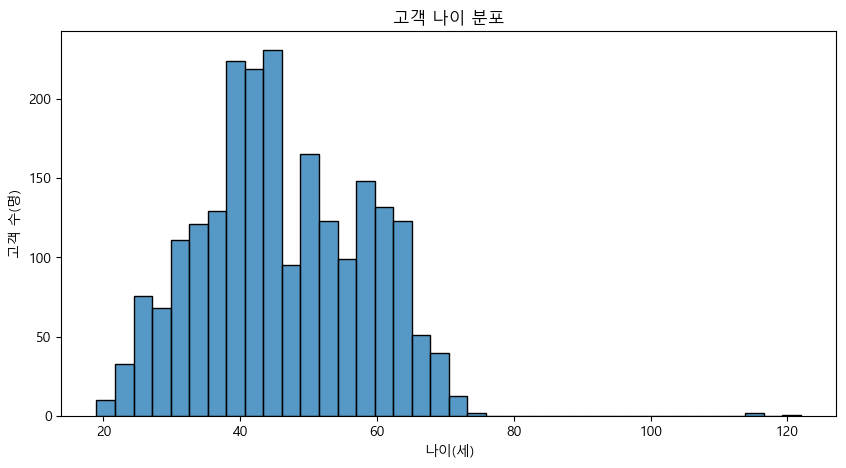

In [16]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = (10,5)
sns.histplot(data=df['age'])
plt.title('고객 나이 분포')
plt.xlabel('나이(세)')
plt.ylabel('고객 수(명)')

In [17]:
df.sort_values(by='age', ascending=False)

,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
239,2022-08,122,78236600.0,미혼,1,23,10400,0,6500,9100,...,1,2,1,4,0,0,0,0,0,0
339,2021-12,116,108591600.0,배우자 있음,0,36,981500,187200,730600,135200,...,4,4,1,9,0,0,0,0,1,0
192,2021-12,115,47632000.0,이혼,1,99,19500,7800,10400,9100,...,2,2,1,5,0,0,0,0,0,0
1950,2021-10,75,66483300.0,미혼,0,96,187200,0,9100,0,...,3,4,1,8,0,0,0,0,0,0
424,2021-07,74,120935100.0,배우자 있음,0,77,1670500,54600,930800,71500,...,7,5,0,12,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2022-06,20,92511900.0,미혼,0,30,367900,22100,483600,179400,...,3,12,1,16,0,0,0,0,0,0
2213,2021-01,20,104802100.0,미혼,0,42,772200,66300,820300,93600,...,4,8,1,13,0,0,0,0,0,0
1850,2020-12,20,108234100.0,미혼,0,56,696800,35100,767000,49400,...,5,12,1,18,0,0,1,0,1,1
1170,2022-05,19,18747300.0,배우자 있음,0,81,0,0,2600,3900,...,1,2,1,4,0,0,1,0,0,0


In [18]:
df = df[df['age'] < 100]

Text(0, 0.5, '고객 수(명)')

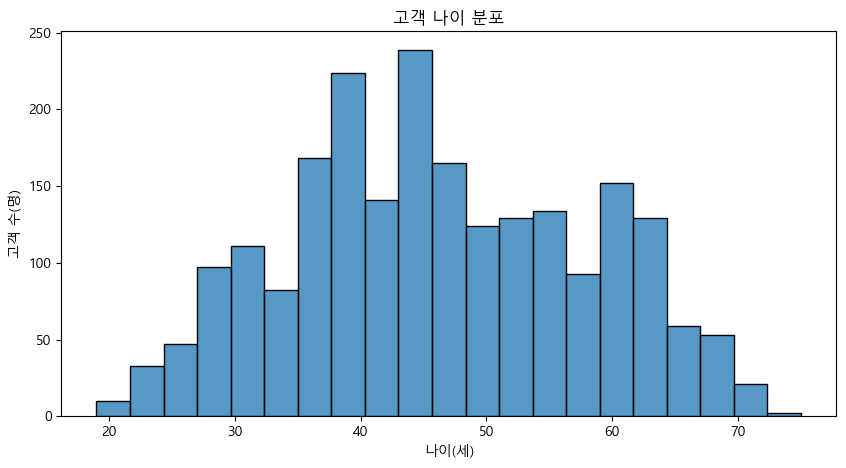

In [19]:
sns.histplot(data=df['age'])
plt.title('고객 나이 분포')
plt.xlabel('나이(세)')
plt.ylabel('고객 수(명)')

In [20]:
age_bins = list(range(10,81,10))
age_bins

[10, 20, 30, 40, 50, 60, 70, 80]

In [21]:
age_labels = [f'{x}대' for x in age_bins[:-1]]
age_labels

['10대', '20대', '30대', '40대', '50대', '60대', '70대']

In [22]:
age_group = pd.cut(x=df['age'], bins=age_bins, labels=age_labels, right=False)

In [23]:
df.insert(
    loc=df.columns.get_loc('age') + 1,
    column='age_group',
    value=age_group,
)
df.head()

,signup_ym,age,age_group,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,58,50대,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,15,0,0,0,0,0,1
1,2022-06,61,60대,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,5,0,0,0,0,0,0
2,2021-11,50,50대,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,19,0,0,0,0,0,0
3,2022-05,31,30대,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,8,0,0,0,0,0,0
4,2022-04,34,30대,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,16,0,0,0,0,0,0


In [24]:
df['age_group'].value_counts()

age_group
40대    678
30대    502
50대    485
60대    338
20대    185
70대     23
10대      2
Name: count, dtype: int64

In [25]:
age_group_replace_dict = {
    '10대': '20대 이하',
    '20대': '20대 이하',
    '60대': '60대 이상',
    '70대': '60대 이상',
}
df['age_group'] = df['age_group'].replace(age_group_replace_dict)

In [26]:
df['age_group'].value_counts()

age_group
40대       678
30대       502
50대       485
60대 이상    361
20대 이하    187
Name: count, dtype: int64

#### 2. 연소득 분포

Text(0, 0.5, '고객 수(명)')

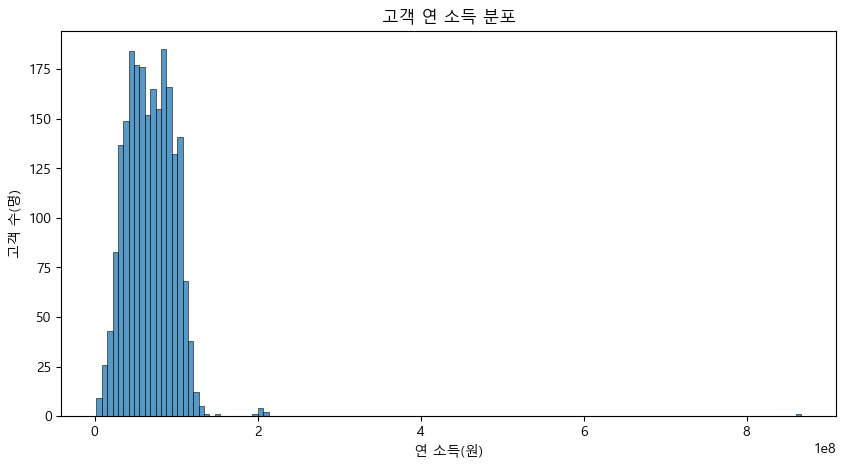

In [27]:
sns.histplot(data=df['annual_income'])
plt.title('고객 연 소득 분포')
plt.xlabel('연 소득(원)')
plt.ylabel('고객 수(명)')

<Axes: xlabel='annual_income'>

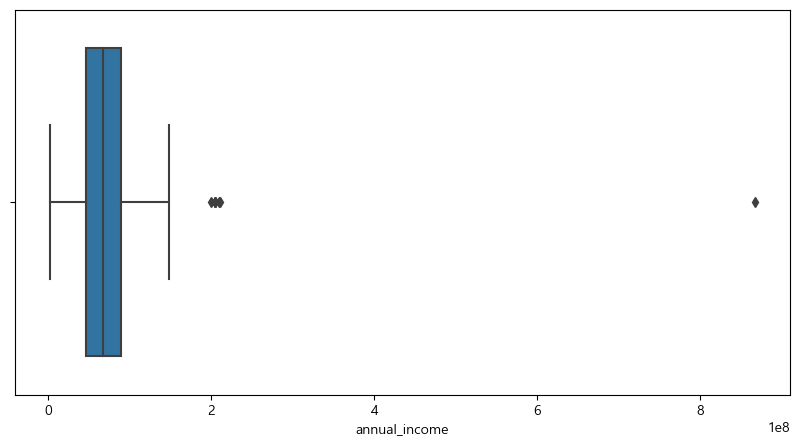

In [28]:
sns.boxplot(data=df, x='annual_income')

In [29]:
income = df['annual_income']
q1 = income.quantile(0.25)
q3 = income.quantile(0.75)
iqr = q3 - q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

normal_condition = (lower_bound <= income) & (income <= upper_bound)
df = df[normal_condition]

<Axes: xlabel='annual_income'>

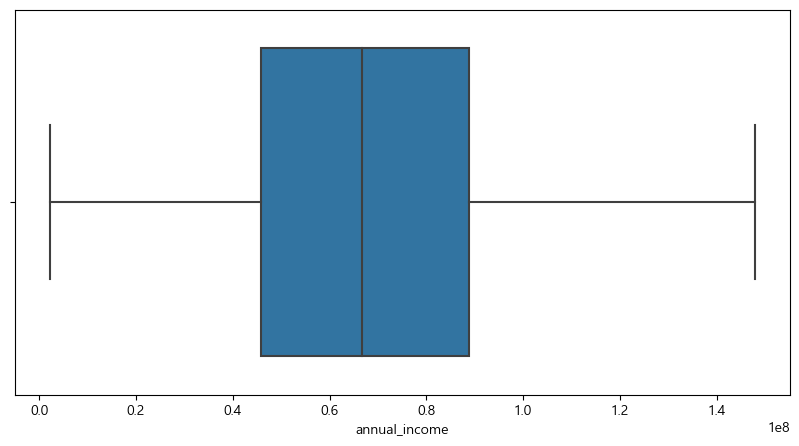

In [31]:
sns.boxplot(data=df, x='annual_income')

### RFM 분석(Recency, Frequency, Monetary 등급 매기기)